In [20]:
from tensorflow.keras.datasets   import boston_housing , mnist , fashion_mnist
from tensorflow.keras.models     import Sequential , clone_model , Model , load_model
from tensorflow.keras.layers     import Dense , Activation , InputLayer , Flatten , Input , BatchNormalization , Dropout , Embedding

# CNN
from tensorflow.keras.layers     import Conv2D , MaxPooling2D , AveragePooling2D

from tensorflow.keras            import optimizers  
from tensorflow.keras.callbacks  import EarlyStopping , ModelCheckpoint , Callback
from tensorflow.keras.optimizers import SGD , Adam , RMSprop

# 이미지 로드
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

# 자연어 처리
from tensorflow.keras.preprocessing.text          import Tokenizer
from tensorflow.keras.preprocessing.sequence      import pad_sequences

from keras.utils.np_utils      import to_categorical

from sklearn.datasets          import load_iris , load_breast_cancer , load_digits
from sklearn.model_selection   import train_test_split

import matplotlib.pyplot as plt

import tensorflow as tf
import numpy  as np
import pandas as pd


In [21]:
train_img_generator = ImageDataGenerator(rescale=1/255,
                                        rotation_range=40,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')
train_generator = train_img_generator.flow_from_directory(
    'C:/Users/crid2/ml-data/beertest/train' , 
    target_size = (200, 200) , 
    batch_size  = 20 ,
    class_mode = 'categorical'
)

Found 5506 images belonging to 33 classes.


In [ ]:
train_generatornerator

In [22]:
test_img_generator = ImageDataGenerator(rescale=1/255,
                                        rotation_range=40,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')
test_generator = test_img_generator.flow_from_directory(
    'C:/Users/crid2/ml-data/beertest/test' , 
    target_size = (200, 200) , 
    batch_size  = 20 ,
    class_mode = 'categorical'
)

Found 527 images belonging to 33 classes.


In [23]:
def img_model() :
  img_model = Sequential()

  img_model.add( Conv2D(input_shape = (200, 200, 3) , filters = 16 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )
      
  img_model.add( Conv2D(filters = 32 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Conv2D(filters = 64 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Conv2D(filters = 64 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Flatten() )
  img_model.add( Dense(units = 512) )
  img_model.add( Activation('relu') )
  img_model.add( Dropout(0.25) )
  
  img_model.add( Dense(units = 33) )
  img_model.add( Activation('softmax') )

  return img_model 


In [24]:
model = img_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 activation_6 (Activation)   (None, 198, 198, 16)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 99, 99, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 activation_7 (Activation)   (None, 97, 97, 32)        0         
                                                      

In [25]:
model.compile(optimizer = RMSprop(lr = 0.001), 
                      loss= 'categorical_crossentropy' , 
                      metrics=['accuracy'] ) 

C:\Users\crid2\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [33]:
model_history = model.fit(train_generator, validation_data=test_generator, epochs = 10  , verbose = 1 )

Epoch 1/10
276/276 [==============================] - 97s 351ms/step - loss: 1.0365 - accuracy: 0.7319 - val_loss: 1.3193 - val_accuracy: 0.6300
Epoch 2/10
276/276 [==============================] - 103s 374ms/step - loss: 1.0197 - accuracy: 0.7368 - val_loss: 1.2740 - val_accuracy: 0.6357
Epoch 3/10
276/276 [==============================] - 101s 366ms/step - loss: 0.9839 - accuracy: 0.7434 - val_loss: 1.3608 - val_accuracy: 0.6205
Epoch 4/10
276/276 [==============================] - 97s 352ms/step - loss: 1.0156 - accuracy: 0.7475 - val_loss: 1.0219 - val_accuracy: 0.7059
Epoch 5/10
276/276 [==============================] - 94s 342ms/step - loss: 0.9894 - accuracy: 0.7490 - val_loss: 1.1636 - val_accuracy: 0.6755
Epoch 6/10
276/276 [==============================] - 95s 343ms/step - loss: 1.0465 - accuracy: 0.7417 - val_loss: 1.3440 - val_accuracy: 0.6281
Epoch 7/10
276/276 [==============================] - 99s 358ms/step - loss: 1.0136 - accuracy: 0.7421 - val_loss: 1.0824 - val_

In [34]:
print('모델 저장')
model.save('example-multi-case.h5')

모델 저장


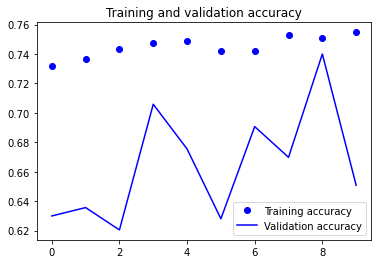

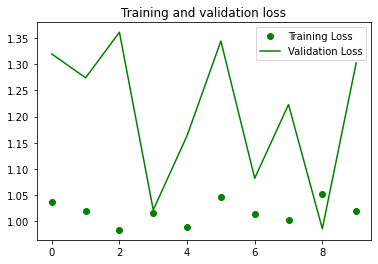

In [35]:
import matplotlib.pyplot as plt

acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [36]:
# Converting a SavedModel to a TensorFlow Lite model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\crid2\AppData\Local\Temp\tmpguobfgit\assets


INFO:tensorflow:Assets written to: C:\Users\crid2\AppData\Local\Temp\tmpguobfgit\assets


In [37]:
with open('C://Users//crid2//beer_test_tflite', 'wb') as f:
  f.write(tflite_model)


In [38]:
train_generator.class_indices

{'강서': 0,
 '강한 IPA': 1,
 '경복궁': 2,
 '골목대장': 3,
 '곰표밀맥주': 4,
 '곰표섬머에일': 5,
 '광화문': 6,
 '남산': 7,
 '대한 IPA': 8,
 '더프로미어오비': 9,
 '맥아더': 10,
 '상상페일에일': 11,
 '성산일출봉': 12,
 '아크': 13,
 '에일의 정석': 14,
 '여수-병맥주': 15,
 '오비': 16,
 '인생에일': 17,
 '제주백록담': 18,
 '제주위트에일': 19,
 '제주펠롱웨일': 20,
 '카스': 21,
 '카스제로': 22,
 '테라': 23,
 '퇴근길': 24,
 '하이트엑스트라콜드': 25,
 '하이트제로': 26,
 '하이트페일라거': 27,
 '한강': 28,
 '해운대': 29,
 '핸드앤몰트 유미의위트에일': 30,
 '흑당 밀키스타우트': 31,
 '흥청망청': 32}

In [47]:
img_src = 'c://users/crid2/downloads/test/test05.jpg'
test_img = image.load_img(img_src, target_size=(200, 200))
x = image.img_to_array(test_img)
x = np.expand_dims(x, axis = 0)
image_ = np.vstack([x])
classes = model.predict(image_, batch_size = 10)
print('pred - ', classes[0])
np.argmax(classes[0])


pred -  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


11